# 1. Problem Statement
* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

# 2. Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 column and 1000 rows.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

### Import the CSV file

In [2]:
df = pd.read_csv(r'data/stud.csv')
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

### 2.2 Dataset information

* gender : sex of students -> (Male/female)

* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

* parental level of education : parents' final education ->(bachelor's degree, some college,master's degree,associate's degree,high school)

* lunch : having lunch before test (standard or free/reduced)

* test preparation course : complete or not complete before test

* math score

* reading score

* writing score

## 3. Data Checks to perform

* Check Missing value
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column


### 3.1 Check Missing values

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

__There are no missing values in the dataset__

### 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

0

__There are no duplicated values__

### 3.3 Check datatypes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Number of Unique values

In [18]:
for i in df.columns:
    values = set(df[i].values)
    print(f"------------------------ ** {i} ** ----------------------------------")
    print(values)
    print()

------------------------ ** gender ** ----------------------------------
{'female', 'male'}

------------------------ ** race_ethnicity ** ----------------------------------
{'group C', 'group D', 'group A', 'group E', 'group B'}

------------------------ ** parental_level_of_education ** ----------------------------------
{"associate's degree", 'some high school', 'high school', "bachelor's degree", 'some college', "master's degree"}

------------------------ ** lunch ** ----------------------------------
{'free/reduced', 'standard'}

------------------------ ** test_preparation_course ** ----------------------------------
{'completed', 'none'}

------------------------ ** math_score ** ----------------------------------
{0, 8, 18, 19, 22, 23, 24, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 8

### 3.5 Statistics of data

In [19]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Adding Total score and Average score columns 

In [3]:
df['total_score'] = df[['math_score','reading_score','writing_score']].sum(axis=1)
df['avg_score'] = round(df['total_score']/3,3)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.667
1,female,group C,some college,standard,completed,69,90,88,247,82.333
2,female,group B,master's degree,standard,none,90,95,93,278,92.667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333
4,male,group C,some college,standard,none,76,78,75,229,76.333


##### Number of students that having full score in all three categories

In [44]:
df[df['avg_score']==100.0].groupby('gender')['avg_score'].count().reset_index()

,gender,avg_score
0,female,2
1,male,1


__Total 3 students scored full marks out of which 2 are by female students__

### Number of students with full scores 

In [30]:
top_math = df[df['math_score'] == 100]['math_score'].count()
top_reading = df[df['reading_score'] == 100]['avg_score'].count()
top_writing =  df[df['writing_score'] == 100]['avg_score'].count()

print('Number of students with full score on each category')
print(f"math: {top_math}")
print("reading: {}".format(top_reading))
print("reading: {}".format(top_writing))

Number of students with full score on each category
math: 7
reading: 17
reading: 14


In [46]:
low_math = df[df['math_score'] < 30]['math_score'].count()
low_reading = df[df['reading_score'] < 30]['avg_score'].count()
low_writing =  df[df['writing_score'] < 30]['avg_score'].count()

print('Number of students with full score on each category')
print(f"math: {low_math}")
print("reading: {}".format(low_reading))
print("reading: {}".format(low_writing))

Number of students with full score on each category
math: 14
reading: 8
reading: 9


### 3.6 Outlier detection

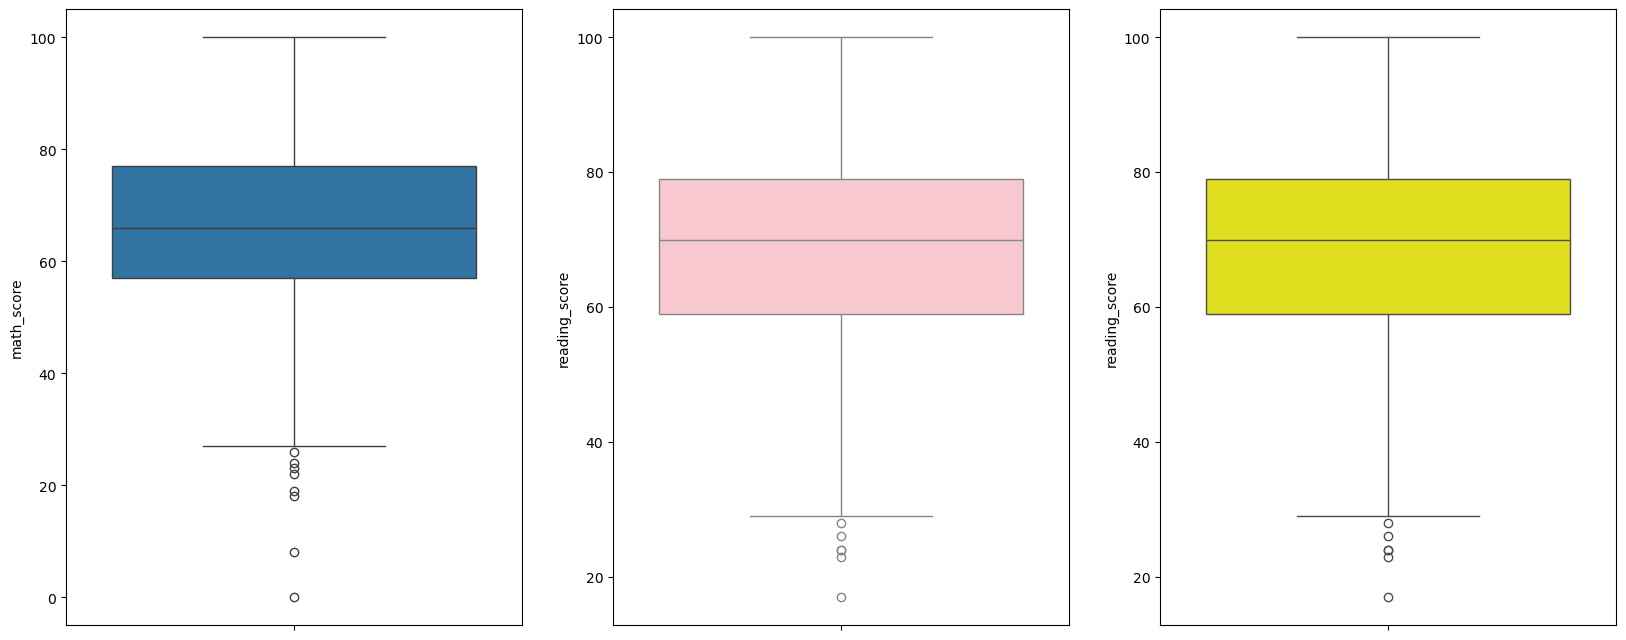

In [26]:
plt.subplots(1,3, figsize=(20,8), sharex=True)
plt.subplot(1,3,1)
sns.boxplot(df['math_score'])
plt.subplot(132)
sns.boxplot(df['reading_score'], color='pink')
plt.subplot(133)
sns.boxplot(df['reading_score'], color='yellow')
plt.show()

* There are no scores that are above the maximum score.
* The lower side outliers can be explained by poor performance in each category

## 4. Analysis

### 4.1 Univariate analysis

Analysing distribution of categorical columns using pie plot

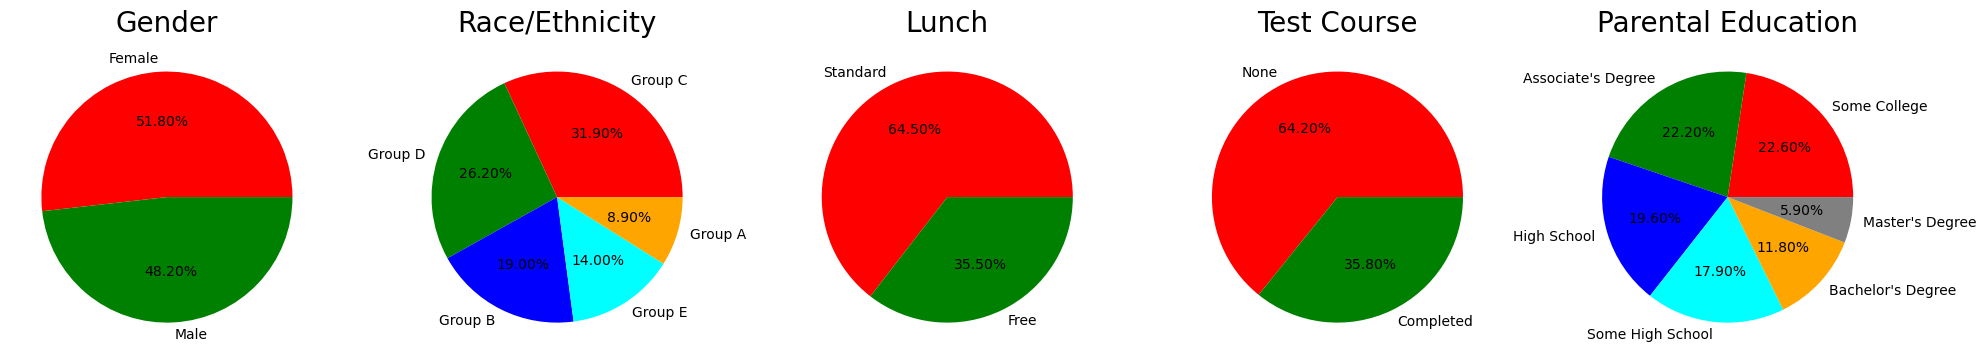

In [10]:
plt.rcParams['figure.figsize'] = (20, 16)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

__Insights__
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

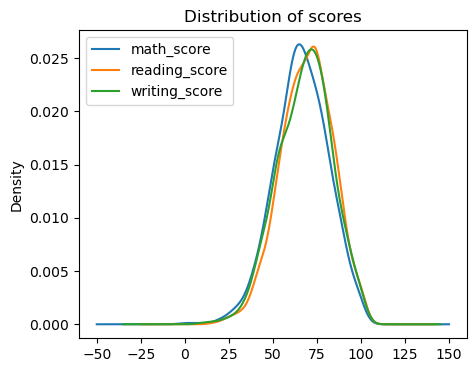

In [17]:
df[['math_score','reading_score','writing_score']].plot(kind='kde', figsize=(5,4))
plt.title('Distribution of scores')
plt.show()

* The distribution is almost near to normal distribution
* Most of the scores are centered arounf the mean

### 4.2 Bivariate Analysis

#### Average scores based on gender

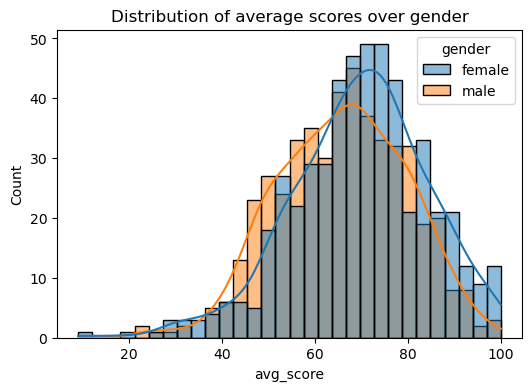

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='avg_score', bins=30, kde=True, hue='gender')
plt.title('Distribution of average scores over gender')
plt.show()

__Observation:__
* Females have performed better than males and most of the higher scores are from female students

#### Performance based on the race_ethnicity

<Axes: xlabel='race_ethnicity', ylabel='avg_score'>

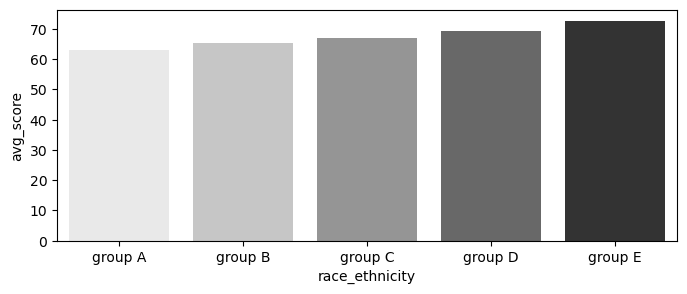

In [31]:
group_race_scores = df.groupby('race_ethnicity').agg({"avg_score":'mean'})
plt.figure(figsize = (8,3))
sns.barplot(data=group_race_scores, x='race_ethnicity', y='avg_score', palette='Greys')

* Group E performed better than all the other groups

#### Relation between parental literacy and test scores

<Axes: xlabel='avg_score', ylabel='parental_level_of_education'>

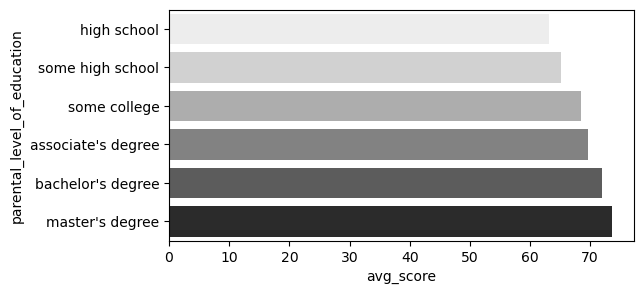

In [34]:
group_race_scores = df.groupby('parental_level_of_education').agg({"avg_score":'mean'})
group_race_scores.sort_values('avg_score',inplace=True)
plt.figure(figsize = (6,3))
sns.barplot(data=group_race_scores, y='parental_level_of_education', x='avg_score', orient='h', palette='Greys')

* There is a slight relation between the education of parents and performance of the students
* Childrens of parents who have higher degree performed better 

#### popularity of lunch type on males and females

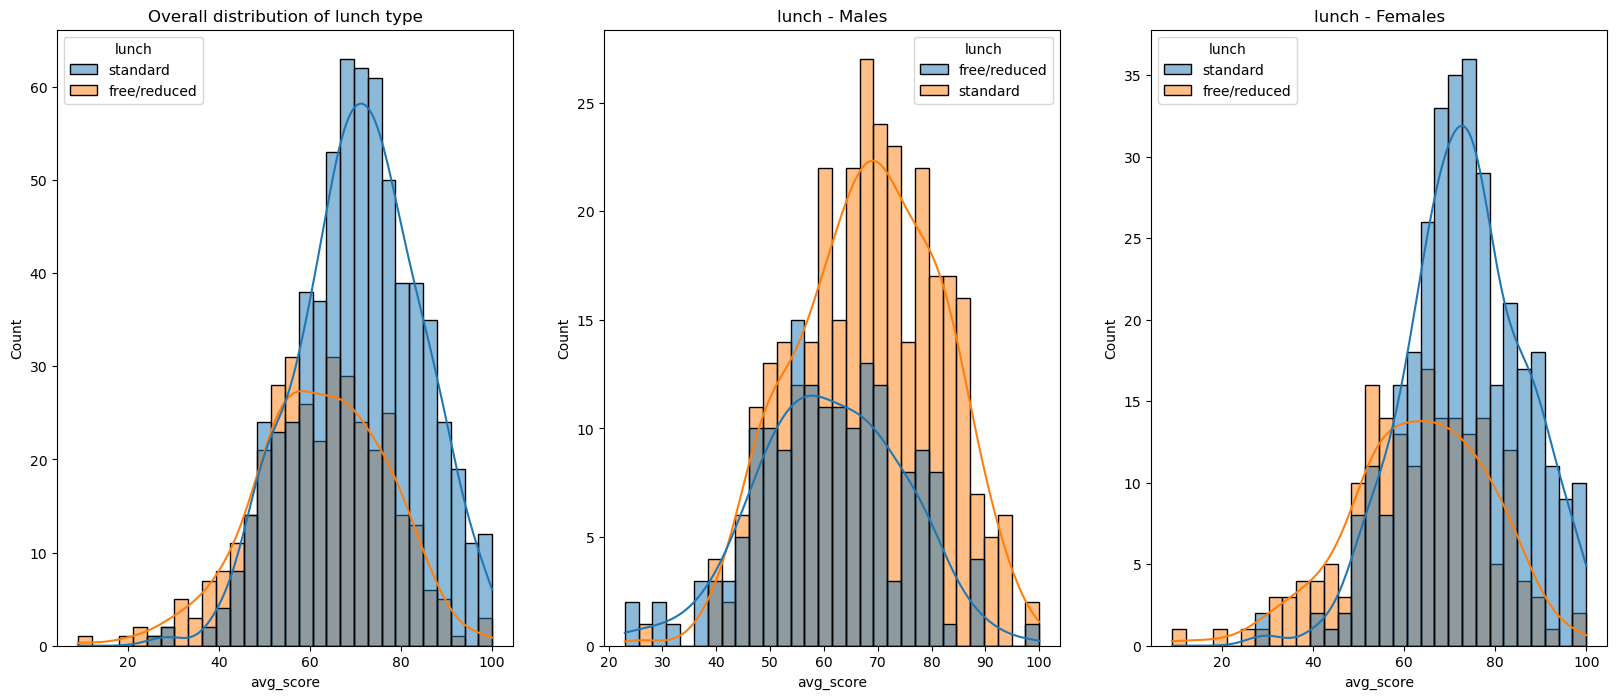

In [48]:
plt.subplots(1,3,figsize=(20,8))
plt.subplot(131)
sns.histplot(data=df, x='avg_score', bins=30, hue='lunch',kde=True)
plt.title('Overall distribution of lunch type')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'], x='avg_score', bins=30, hue='lunch',kde=True)
plt.title('lunch - Males')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'], x='avg_score', bins=30, hue='lunch',kde=True)
plt.title('lunch - Females')
plt.show()

__Observation:__
   * Standard lunch is more popular and more number of students are enrolled for standard lunch, also average scored of standard lunch students looks higher
   * Standerd lunch may help is improving performance in both male and female

#### Impact of test preparation course on performance

In [51]:
df['test_preparation_course'].unique().tolist()

['none', 'completed']

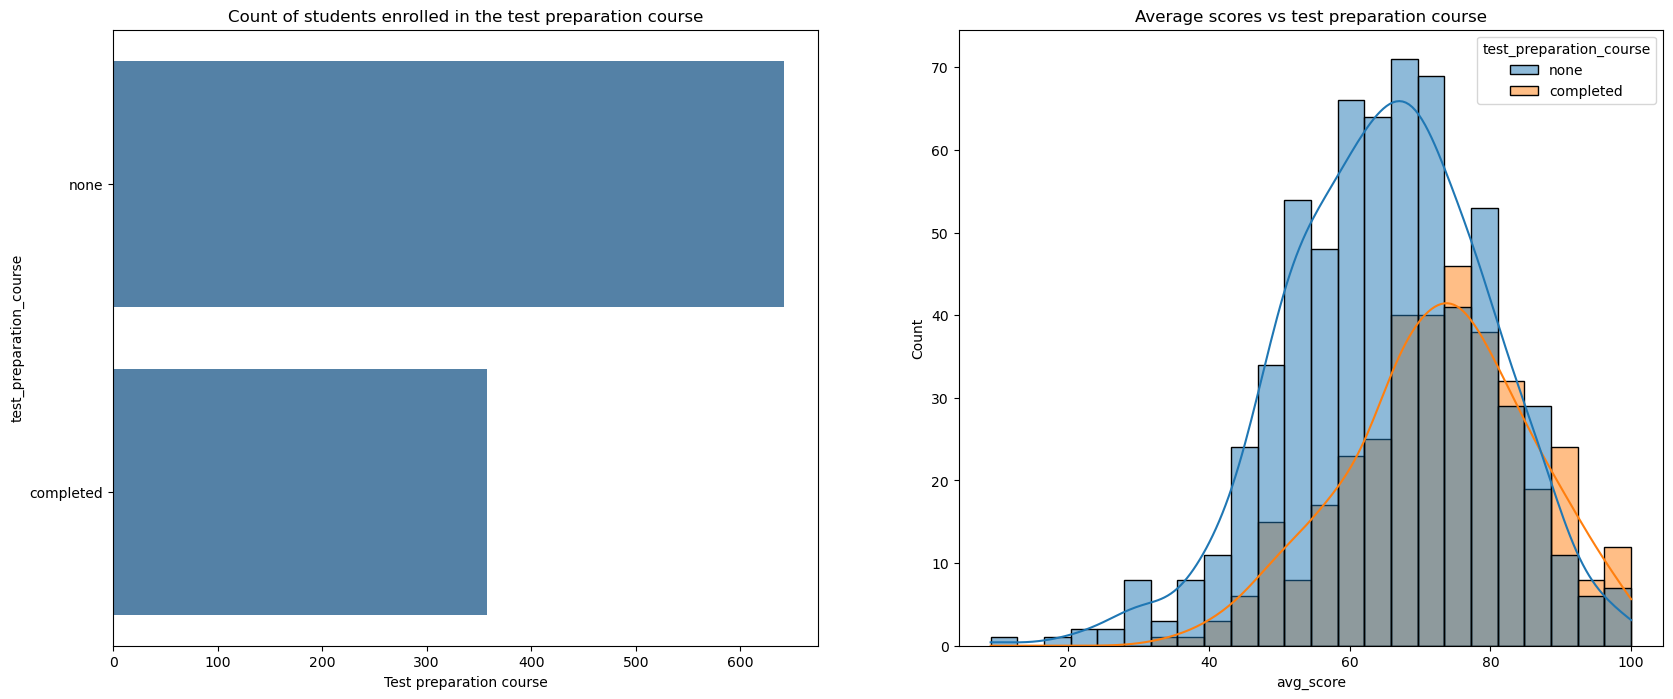

In [62]:
plt.subplots(1,2,figsize=(20,8))
plt.subplot(121)
sns.countplot(data=df['test_preparation_course'], color='Steelblue')
plt.xlabel('Test preparation course')
plt.title('Count of students enrolled in the test preparation course')
plt.subplot(122)
sns.histplot(data=df, x='avg_score', hue='test_preparation_course',kde=True)
plt.title('Average scores vs test preparation course')
plt.show()

__Obseration:__
* There are less number of students who have completed the course
* The students who have completed the course have performed better in the test compared to students who have not completed the test

#### Impact of parents education on male and female students

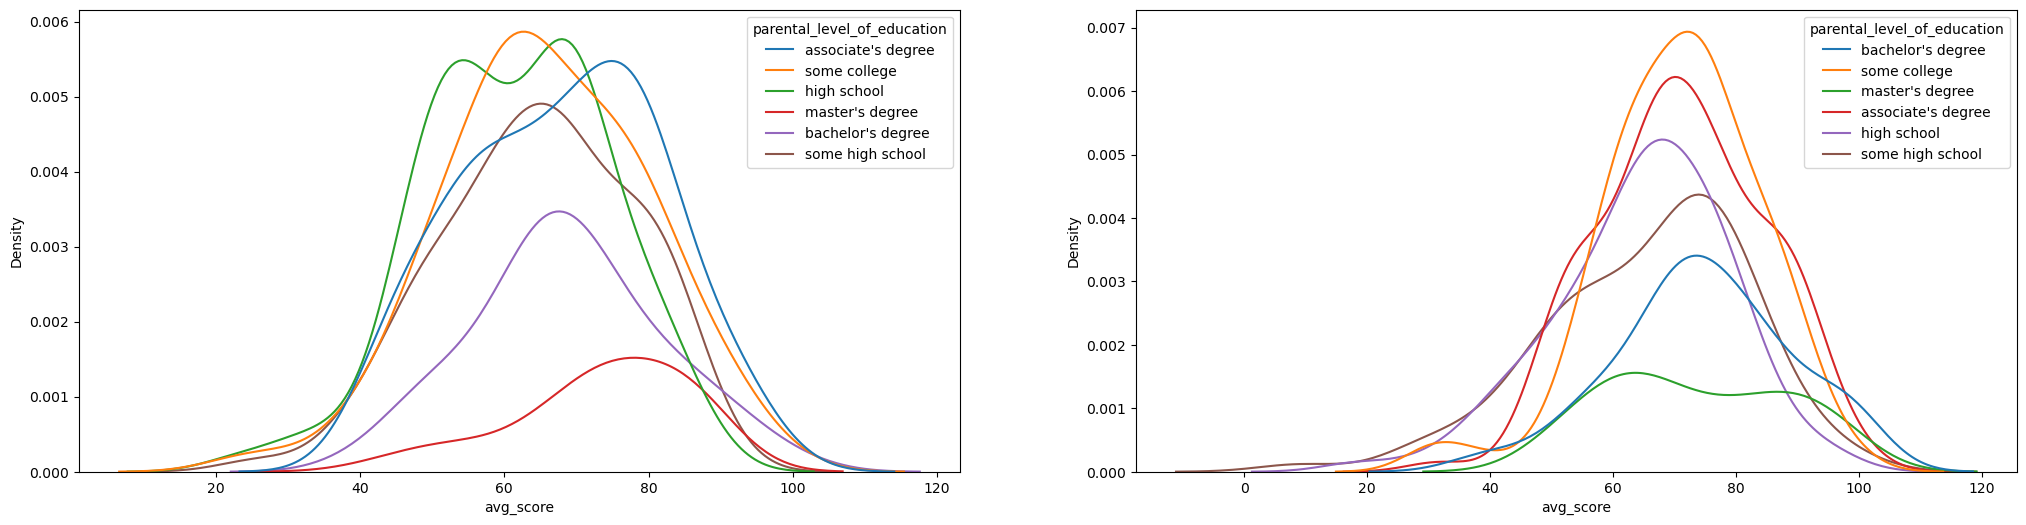

In [73]:
plt.subplots(1,2,figsize=(25,6))
plt.subplot(121)
ax =sns.kdeplot(data=df[df.gender=='male'],x='avg_score',hue='parental_level_of_education')
plt.subplot(122)
ax =sns.kdeplot(data=df[df.gender=='female'],x='avg_score',hue='parental_level_of_education')
plt.show()

__Observation:__
* There isn't a signigicant impact on parents education on female students as all the distributions look similar and peaks are around the same avg_score.    
* In males, students whose parents are of masters degree slightly performed better, rest of the degrees performed the same

### 4.3 Multivariate analysis

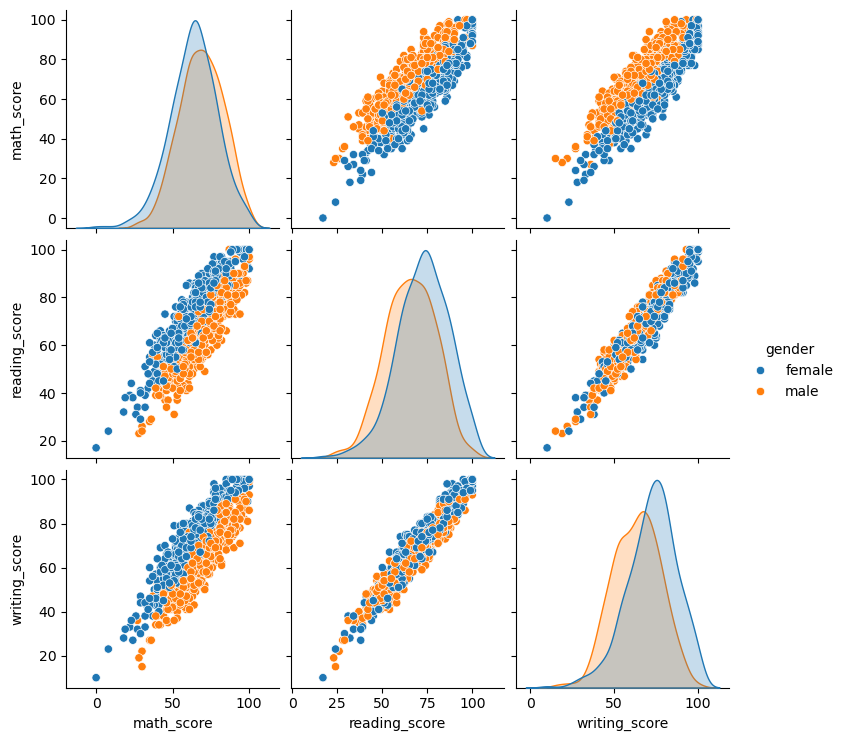

In [76]:

sns.pairplot(df[['math_score','reading_score','writing_score','gender']], hue='gender')
plt.show()

* The scores on all 3 categories increase linearly 

### 5. Conclusions
* Student's Performance is related with lunch, race, and slightly on parental level education
* Females lead in pass percentage and also are top-scorers in all tests.
* Student's Performance can be improved by completing test preparation course.
* Standard lunch is preferred for improving performance.